In [2]:
import pandas as pd

In [3]:
all_features_x20 = pd.read_csv('/home/think/Desktop/csv_files/all_features.csv')

In [4]:
all_features_x20

,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,...,y__fourier_entropy__bins_5,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,y__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,0.0,774.013307,192383.394273,0.038264,-0.000375,2.156915e-06,-0.096896,...,0.045395,0.125256,0.136002,0.718550,0.744007,0.769456,0.794897,0.820329,NaN,11.424825
1,1.0,0.0,0.0,0.0,483.633601,209091.544304,0.040962,-0.000603,3.655258e-06,-0.166466,...,0.045395,0.125256,0.136002,0.718719,0.744341,0.769954,0.795560,0.821158,NaN,11.427862
2,1.0,0.0,0.0,0.0,592.282455,202901.126317,0.041253,-0.000080,3.940044e-06,-0.235208,...,0.045395,0.125256,0.136002,0.718443,0.743963,0.769474,0.794978,0.820473,NaN,11.400400
3,1.0,0.0,0.0,0.0,488.595747,217362.813739,0.043383,-0.000101,4.801478e-06,-0.292160,...,0.045395,0.125256,0.136002,0.718570,0.744191,0.769804,0.795409,0.821006,NaN,11.428826
4,1.0,0.0,0.0,0.0,2266.440732,573943.871589,0.314801,-0.000439,1.473376e-05,0.711100,...,0.170467,0.260704,0.406332,0.812217,0.931429,1.052162,1.173759,1.297051,NaN,17.920598
5,1.0,0.0,0.0,0.0,-14793.727883,576901.035968,0.308808,0.000265,-1.775693e-05,-2.079867,...,0.204871,0.271451,0.406332,0.815437,0.937733,1.060038,1.183175,1.310926,NaN,17.913026
6,1.0,0.0,0.0,0.0,-24076.622032,573953.574115,0.314218,-0.000197,-5.741740e-06,-3.143614,...,0.170467,0.260704,0.406332,0.812665,0.933453,1.055265,1.177758,1.302618,NaN,17.869628
7,1.0,0.0,0.0,0.0,-6907.638883,576236.975733,0.304367,0.000245,1.132474e-05,-0.916875,...,0.170467,0.249958,0.395585,0.819443,0.947921,1.077236,1.208461,1.342484,NaN,17.887823
8,0.0,0.0,0.0,0.0,-72.283197,3418.240633,0.016620,-0.000117,2.005318e-06,-0.003274,...,0.079983,0.136002,0.181214,0.764835,0.836416,0.908321,0.980531,1.053474,NaN,1.527228
9,0.0,0.0,0.0,0.0,-43.506792,3504.589577,0.017079,-0.000053,1.141968e-06,-0.003119,...,0.079983,0.136002,0.181214,0.764922,0.837015,0.909850,0.982556,1.056293,NaN,1.524107


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# X is your DF of shape (20, ~788)
X = all_features_x20.copy()

# 1. Use MinMaxScaler to normalize each feature to range [0, 1]
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)

# Optionally wrap back to DataFrame to keep column names:
X_mm = pd.DataFrame(X_mm, index=X.index, columns=X.columns)

# 2. Compute variances
vars = X_mm.var(axis=0)
vars.describe()  # check distribution

# 3. Choose a threshold
# e.g. only keep features with variance > 0.005
threshold = 0.1

# 4. Apply VarianceThreshold
sel = VarianceThreshold(threshold=threshold)
X_highvar = sel.fit_transform(X_mm)
features_highvar = [f for f, keep in zip(X.columns, sel.get_support()) if keep]

print(f"Features kept: {len(features_highvar)} (threshold={threshold})")

X_filtered_step_1 = X_mm[features_highvar]

Features kept: 194 (threshold=0.1)


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/think/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [8]:
from sklearn.decomposition import PCA

In [9]:
X_pca = PCA(n_components=2).fit_transform(X_filtered_step_1)  # shape (500,2)
pc1, pc2 = X_pca[:, 0], X_pca[:, 1]

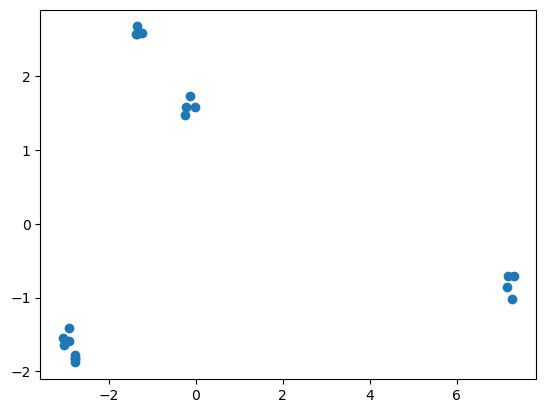

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

In [5]:
chaos_features_x20 = pd.read_csv('/home/think/Desktop/csv_files/chaos_features.csv')

In [6]:
chaos_features_x20.head()

,lyap,corr_dim,ap_entropy,system
0,0.000906,1.303454,0.026955,rossler
1,0.000650,1.421300,0.030519,rossler
2,0.001003,1.465523,0.032465,rossler
3,0.000947,1.480771,0.033371,rossler
4,0.008874,1.581581,0.144200,lorenz63


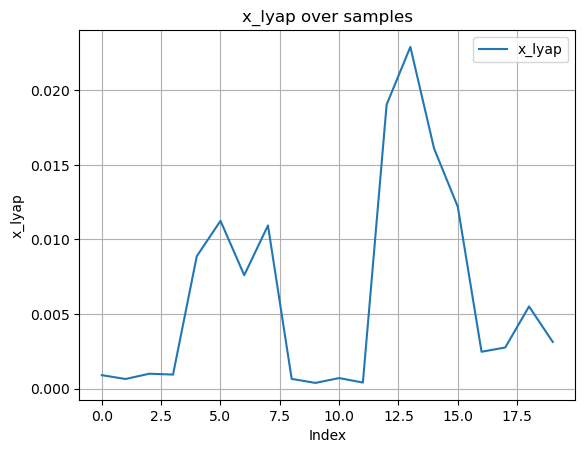

In [20]:
import matplotlib.pyplot as plt

plt.plot(chaos_features_x20['lyap'], label='x_lyap')
plt.xlabel('Index')
plt.ylabel('x_lyap')
plt.title('x_lyap over samples')
plt.legend()
plt.grid(True)
plt.show()

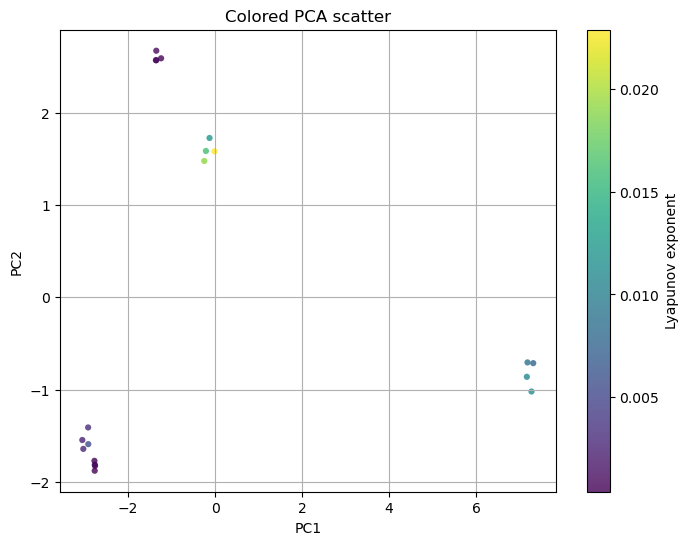

In [21]:
import matplotlib.pyplot as plt

pc1, pc2 = X_pca[:, 0], X_pca[:, 1]
values = chaos_features_x20['lyap'].values  # or whatever continuous scalar you want

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    pc1, pc2,
    c=values,
    cmap='viridis',
    s=20,  # size of each point
    alpha=0.8,
    edgecolor='none'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Colored PCA scatter')
plt.colorbar(sc, label='Lyapunov exponent')
plt.grid(True)
plt.show()


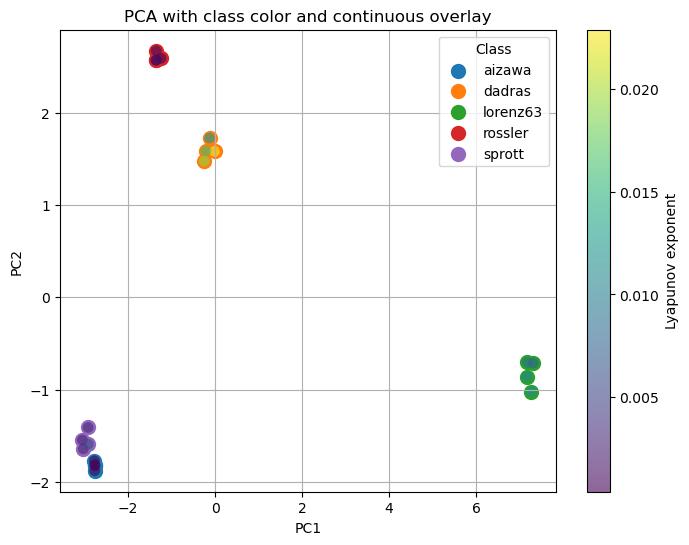

In [53]:
import matplotlib.pyplot as plt

pc1, pc2 = X_pca[:, 0], X_pca[:, 1]

# Categorical class labels
classes = chaos_features_x20['system'].values
unique_classes = list(np.unique(classes))

# Continuous value to color by
values = chaos_features_x20['lyap'].values

plt.figure(figsize=(8, 6))

# 1️⃣ Layer 1: Solid color by class
for cls in unique_classes:
    mask = classes == cls
    plt.scatter(
        pc1[mask], pc2[mask],
        label=cls,
        s=100,
        alpha=1.0  # fully opaque
    )



# 2️⃣ Layer 2: Semi-transparent overlay color by continuous value
plt.scatter(
    pc1, pc2,
    c=values,
    cmap='viridis',
    s=60,
    alpha=0.6,  # translucent overlay
    edgecolor='none'
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with class color and continuous overlay')
plt.legend(title='Class')
cbar = plt.colorbar(label='Lyapunov exponent')
plt.grid(True)
plt.show()


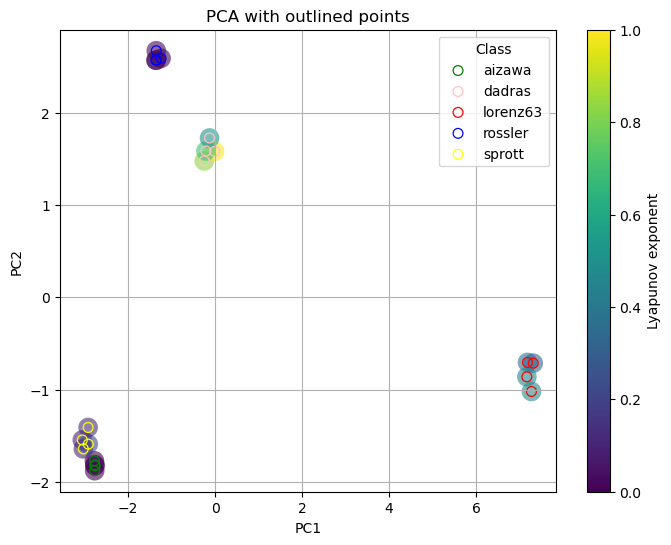

In [52]:
import matplotlib.pyplot as plt

pc1, pc2 = X_pca[:, 0], X_pca[:, 1]
classes = chaos_features_x20['system'].values
unique_classes = list(np.unique(classes))

plt.figure(figsize=(8, 6))




# 2️⃣ Layer 2: Semi-transparent overlay color by continuous value
plt.scatter(
    pc1, pc2,
    c=values,
    cmap='viridis',
    s=200,
    alpha=0.6,  # translucent overlay
    edgecolor='none'
)


class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
for cls in unique_classes:
    mask = classes == cls
    plt.scatter(
        pc1[mask], pc2[mask],
        facecolors='none',
        edgecolor=class_colors.get(cls, 'black'),
        linewidths=0.9,
        label=cls,
        s=50
    )


# # Plot outlined points by class
# for cls in unique_classes:
#     mask = classes == cls
#     plt.scatter(
#         pc1[mask], pc2[mask],
#         facecolors='none',           # No fill color
#         edgecolor='black',            # Outline color for the class
#         linewidths=1.5,               # Adjust thickness here
#         label=cls,
#         s=60                          # Marker size
#     )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with outlined points')
plt.legend(title='Class')
plt.grid(True)
cbar = plt.colorbar(label='Lyapunov exponent')
plt.show()


In [1]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

def fused_visualization(
    df, values, cmap='jet',
    class_colors=None,
    alpha_overlay=0.6,
    marker_size_overlay=200,
    marker_size_outline=10,
    linewidths_outline=0.9
):
    # Labels and features
    y_raw = df.iloc[:, 0].values       # First column = labels
    X = df.iloc[:, 1:].values           # Rest = features
    
    # Encode classes numerically
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    unique_classes = list(np.unique(y_raw))
    
    # Dimensionality reductions
    X_pca = PCA(n_components=2).fit_transform(X)
    X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)
    X_umap = umap.UMAP(random_state=0).fit_transform(X)
    embeddings = [X_pca, X_tsne, X_umap]
    titles = ['PCA', 't-SNE', 'UMAP']

    # Set up subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for ax, coords, title in zip(axs, embeddings, titles):
        pc1, pc2 = coords[:, 0], coords[:, 1]

        # 1️⃣ Overlay continuous variable as translucent scatter
        sc = ax.scatter(
            pc1, pc2,
            c=values,
            cmap=cmap,
            s=marker_size_overlay,
            alpha=alpha_overlay,
            edgecolor='none'
        )

        # 2️⃣ Outline by class color
        for cls in unique_classes:
            mask = y_raw == cls
            ax.scatter(
                pc1[mask], pc2[mask],
                facecolors='none',
                edgecolor=class_colors.get(cls, 'black') if class_colors else 'black',
                linewidths=linewidths_outline,
                label=cls,
                s=marker_size_outline
            )
        ax.set_title(title)
        ax.set_xlabel('Dim 1')
        ax.set_ylabel('Dim 2')
        ax.grid(True)

    # Single colorbar for continuous variable
    cbar = fig.colorbar(sc, ax=axs, label='Continuous value')
    axs[0].legend(title='Class')
    plt.tight_layout()
    plt.show()


In [10]:
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
X_filtered_step_1['sample_name'] = sample_names

# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in X_filtered_step_1.columns if col != 'sample_name']
X_filtered_step_1 = X_filtered_step_1[cols]

/tmp/ipykernel_11357/386553058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered_step_1['sample_name'] = sample_names


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_11357/1525188036.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


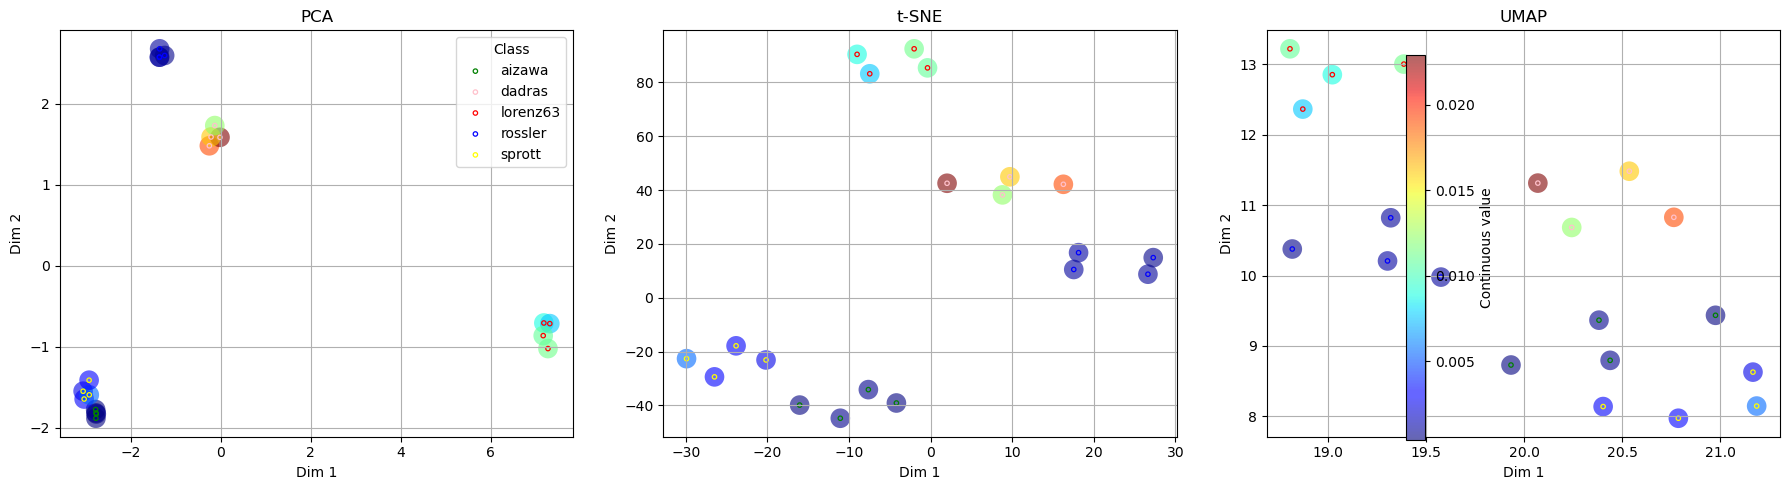

In [11]:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization(
    df=X_filtered_step_1,
    values=chaos_features_x20['lyap'].values,
    cmap='jet',
    class_colors=class_colors
)
